<a href="https://colab.research.google.com/github/Grace02505/Notebook/blob/main/GDPR_violations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import datetime


In [3]:
data = pd.read_table("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-21/gdpr_violations.tsv")
data.head()

,id,picture,name,price,authority,date,controller,article_violated,type,source,summary
0,1,https://www.privacyaffairs.com/wp-content/uplo...,Poland,9380,Polish National Personal Data Protection Offic...,10/18/2019,Polish Mayor,Art. 28 GDPR,Non-compliance with lawful basis for data proc...,https://uodo.gov.pl/decyzje/ZSPU.421.3.2019,No data processing agreement has been conclude...
1,2,https://www.privacyaffairs.com/wp-content/uplo...,Romania,2500,Romanian National Supervisory Authority for Pe...,10/17/2019,UTTIS INDUSTRIES,Art. 12 GDPR|Art. 13 GDPR|Art. 5 (1) c) GDPR|A...,Information obligation non-compliance,https://www.dataprotection.ro/?page=A_patra_am...,A controller was sanctioned because he had unl...
2,3,https://www.privacyaffairs.com/wp-content/uplo...,Spain,60000,Spanish Data Protection Authority (AEPD),10/16/2019,Xfera Moviles S.A.,Art. 5 GDPR|Art. 6 GDPR,Non-compliance with lawful basis for data proc...,https://www.aepd.es/resoluciones/PS-00262-2019...,The company had unlawfully processed the perso...
3,4,https://www.privacyaffairs.com/wp-content/uplo...,Spain,8000,Spanish Data Protection Authority (AEPD),10/16/2019,Iberdrola Clientes,Art. 31 GDPR,Failure to cooperate with supervisory authority,https://www.aepd.es/resoluciones/PS-00304-2019...,Iberdrola Clientes violated Article 13 of the ...
4,5,https://www.privacyaffairs.com/wp-content/uplo...,Romania,150000,Romanian National Supervisory Authority for Pe...,10/09/2019,Raiffeisen Bank SA,Art. 32 GDPR,Failure to implement sufficient measures to en...,https://www.dataprotection.ro/?page=Comunicat_...,Raiffeisen Bank Romania did not observe the ne...


In [4]:
data['Date'] = pd.to_datetime('')

Time breakdown of the total violations in the EU.

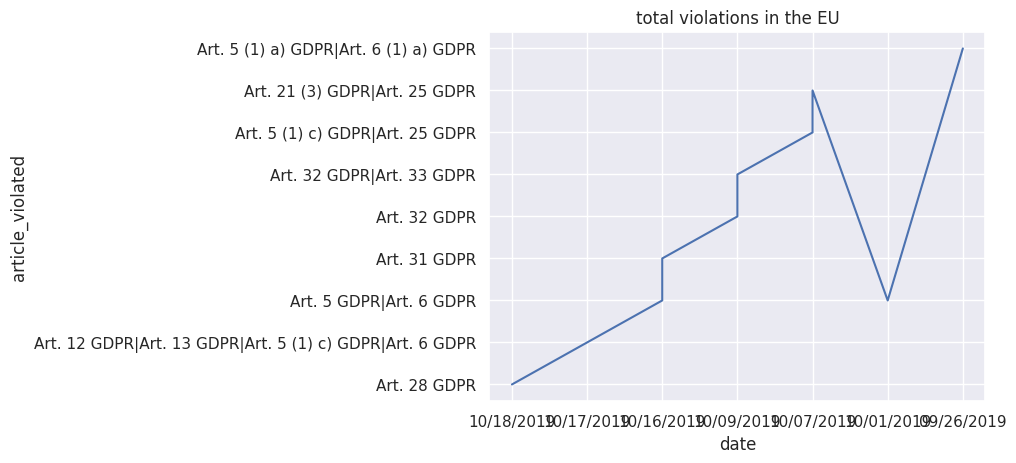

In [5]:
data9=data.head(10)
date= data9.date
article_violated= data9.article_violated
type=data9.type
name=data9.name
plt.plot(date,article_violated)
plt.title('total violations in the EU')
plt.xlabel('date')
plt.ylabel('article_violated')
plt.show()

Most expensive violation by country, listing the specific violation type e.g failure to comply with processing regulation

In [6]:
data1=pd.DataFrame(data,columns=["name","price","type"])
most_expensive=data1.sort_values(by ="price",ascending=False).reset_index(drop=True)
most_expensive.head(1)

,name,price,type
0,France,50000000,Several


(array([[10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 3.,  3.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([       0.,  5000000., 10000000., 15000000., 20000000., 25000000.,
        30000000., 35000000., 40000000., 45000000., 50000000.]),
 <a list of 3 BarContainer objects>)

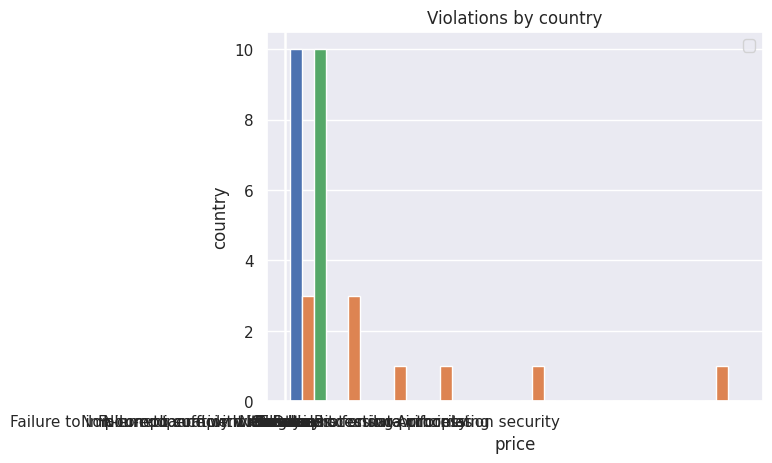

In [7]:
data3=most_expensive.head(10)
plt.xlabel("price")
plt.ylabel("country")
plt.title("Violations by country")
plt.legend("type")
plt.hist(data3)

Vodafone's GDPR violations in volume.

In [7]:
data4 = data.dropna(subset=['Controller_Processor'])
# if data['VIOLATED_ARTICLES'].isnull().values.any():
#     print("VIOLATED_ARTICLES has NaN values.")
# else:
#     print("VIOLATED_ARTICLES does not have NaN values.")
#data['Date'] = pd.to_datetime(data['Date'])


# group the data by company and count the number of violations
grouped = data.groupby(['Controller_Processor'])['VIOLATED_ARTICLES'].count()

for company, count in grouped.items():
    if pd.isna(company):
        print(f"No company name recorded for {count} violations.")
    else:
        print("{company} committed {count} violations."

Companies with the highest violations

In [8]:
data7=pd.DataFrame(data,columns=["price","controller"])
highest_violations=data7.sort_values(by ="price",ascending=False).reset_index(drop=True)
highest_violations.head(6)

,price,controller
0,50000000,Google Inc.
1,27802946,TIM - Telecom Provider
2,18000000,Austrian Post
3,14500000,Deutsche Wohnen SE
4,9550000,1&1 Telecom GmbH
5,8500000,Eni Gas e Luce


Map the data and make this interactive. Bonus but useful

In [9]:
 #To ggregate the data by country and sum the amount
df_agg = data.groupby('Country', as_index=False).agg({'Amount': 'sum'})

# To create a map with a custom colorscale
fig = px.choropleth(df_agg,
                    locations="Country",
                    locationmode='country names',
                    color="Amount",
                    color_continuous_scale=px.colors.sequential.Bluered_r,
                    range_color=(0, df_agg['Amount'].max()),
                    title='Total amount fined by country')

fig.show()

KeyError: ignored

Breakdown / Distribution and important metrics of fines levied per article. Prepare a Box, plot

In [11]:
import seaborn as sns
sns.set()
with sns.axes_style(style='ticks'):
    g = sns.factorplot("article_violated", "price", data= data, kind="box")
    g.set_axis_labels("article_violated", "price");

AttributeError: ignored

Top 10 most violated articles

In [10]:
data3=pd.DataFrame(data,columns=["article_violated","price"])
top_ten=data3.sort_values(by = "price",ascending=False).reset_index(drop=True)
top_ten.head(10)

,article_violated,price
0,Art. 13 GDPR|Art. 14 GDPR|Art. 6 GDPR|Art. 4 G...,50000000
1,Art. 58(2) GDPR,27802946
2,Art. 5 (1) a) GDPR|Art. 6 GDPR,18000000
3,Art. 5 GDPR|Art. 25 GDPR,14500000
4,Art. 32 GDPR,9550000
5,Art. 5 GDPR|Art. 6 GDPR|Art. 17 GDPR|Art. 21 GDPR,8500000
6,Art. 5 GDPR|Art. 6 GDPR|Art. 17 GDPR,7000000
7,Art. 5 GDPR|Art. 6 GDPR,3000000
8,Art. 32 GDPR,2600000
9,Art. 32 GDPR,900000


Articles with the highest associated fine

In [13]:
data5=pd.DataFrame(data, columns=("article_violated","price"))
highest_fine=data5.sort_values(by = "price",ascending=True).reset_index(drop=True)
highest_fine.head(5)

,article_violated,price
0,Art. 32 GDPR,0
1,Art. 5 GDPR|Art. 25 GDPR,0
2,Art. 6 GDPR,0
3,"Art. 15 (1), (3) GDPR",0
4,Art. 32 GDPR,0
